Optimising mean...
iteration    0: 2354707.0
iteration   50:   56954.4
Optimising mean and covariance...
iteration    0:   85829.6
iteration   50:    7727.9
5988.909


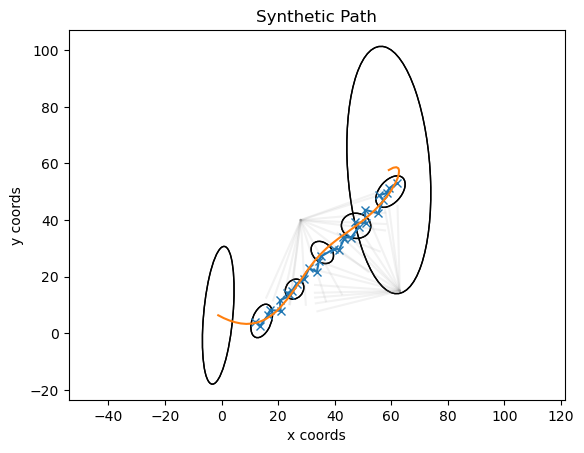

In [6]:
from BLEanalysis.synthetic import SimpleDemo
from BLEanalysis.kernels import ExponentiatedQuadraticKernel
from BLEanalysis.pathinference import Path_VectorsToBee
import numpy as np

demo = SimpleDemo()
k = ExponentiatedQuadraticKernel(4.0,20.0)
path = Path_VectorsToBee(demo.obstimes,demo.observations,k,8,0.1)
path.run(100,learning_rate=2)
print(path.calc_elbo(path.surrogate_mean,path.surrogate_cov_tril))
demo.plot()
path.plot()

In [8]:
demo.observations.shape

(30, 4)